# Lab 1
Variant 4

In [81]:
import pandas as pd

def load_data(data_path):
    return pd.read_csv(data_path, skiprows=6)

## Lazy random walk with fixed world-size

Here we will have lazy random walk with fixed world size and will be changing number of agents and lambda

In [82]:
lazy_world_size = load_data('data/experiment-lazy-fixed-word-size-table.csv')
lazy_world_size = lazy_world_size.drop(columns=['[run number]', '[step]'])
lazy_world_size = lazy_world_size.groupby(['lambda', 'num']).mean().reset_index('lambda')

In [83]:
lazy_world_size.head()

,lambda,world-size,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
num,,,,,,,,
50,0.5,40.0,0.089790,9.183466,0.0,0.0,7.666514,10000.0
51,0.5,40.0,0.094878,9.053271,0.0,0.0,8.321902,10000.0
52,0.5,40.0,0.094582,8.392050,0.0,0.0,7.422649,10000.0
53,0.5,40.0,0.091435,8.563533,0.0,0.0,7.933242,10000.0
54,0.5,40.0,0.094427,8.574263,0.0,0.0,7.674135,10000.0


In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel, title

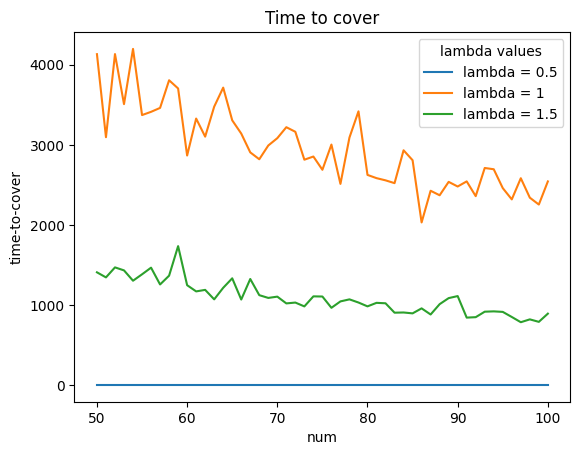

In [85]:
lazy_world_size.groupby('lambda')['time-to-cover'].plot(legend=True, xlabel='num', ylabel='time-to-cover', title='Time to cover')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

We can see that it takes less time to cover all world (for all lambda except less than 1) when there are more number of agents. And it is obvious, because the more agents the more area is covered in one tick.  
Lets look to formula of agent step to explain this plot step-size = lambda ^ (ticks / 100)  
When we have lambdas less than 1, our step size becomes smaller with every tick and then we reach a state where agents barely move, so they cannot cover all world.  
For lambdas >= 1, the bigger lambda is, the faster agents cover all world, because their step grow faster

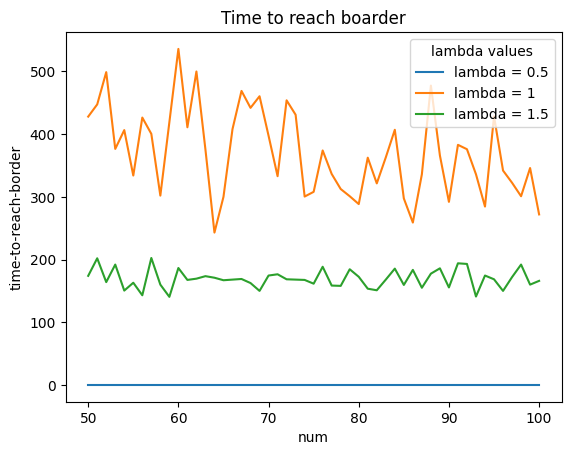

In [86]:
lazy_world_size.groupby('lambda')['time-to-reach-border'].plot(legend=True, xlabel='num', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

The situation with time to reach border is quite similar to tome to cover, but we can see than it is not becoming smaller with increasing number of agents. It is like this, because the time when first agent will reach border do not depend on number of these agents.  
  
Below we can see that when lambda is less than 1, the step will really become too small and agents will cover only 8% of the world

In [87]:
lazy_world_size.groupby('lambda')['percentage-of-visited'].mean()

lambda
0.5      8.666481
1.0    100.000000
1.5    100.000000
Name: percentage-of-visited, dtype: float64

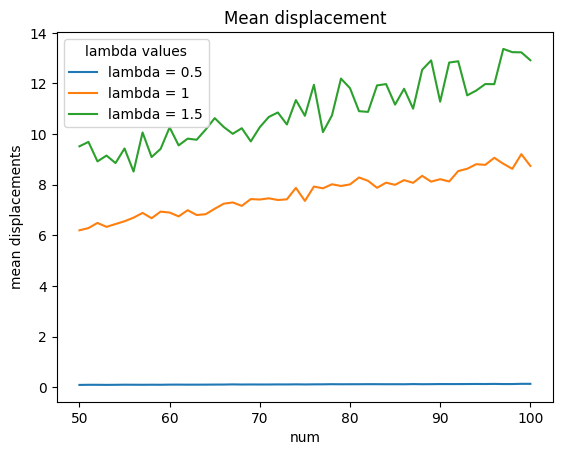

In [88]:
lazy_world_size.groupby('lambda')['mean displacements-before-border-reach'].plot(legend=True, xlabel='num', ylabel='mean displacements', title='Mean displacement')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

For lambda 0.5 (and all less than 1), mean displacement is zero on this plot, but actually it starts from some point and then drops very fast because of decreasing step size.
For other lambdas, for biggest lambdas we will have biggest displacement, because of step size.
Also mean displacement will be nigger for bigger number of agents, because they will go in more directions.

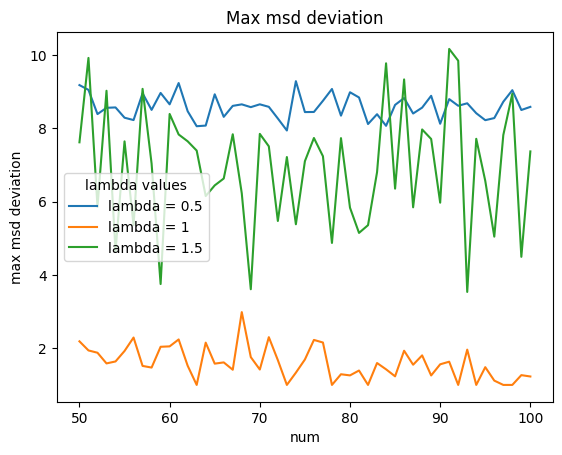

In [89]:
lazy_world_size.groupby('lambda')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='num', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

Here we can see how max msd deviation depends on number of agents and it is obvious.

## Lazy random walk with fixed num

Here we will have lazy random walk with fixed number of agents and will be changing world size and lambda

In [90]:
lazy_num = load_data('data/experiment-lazy-fixed-num-table.csv')
lazy_num = lazy_num.drop(columns=['[run number]', '[step]'])
lazy_num = lazy_num.groupby(['lambda', 'world-size']).mean().reset_index('lambda')

In [91]:
lazy_num.head()

,lambda,num,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
world-size,,,,,,,,
10,0.5,100.0,8.608490,1.00000,0.0,31.0,98.979592,10000.0
11,0.5,100.0,7.205383,1.00000,0.0,36.0,92.911153,10000.0
12,0.5,100.0,7.332174,1.00000,0.0,44.5,89.520000,10000.0
13,0.5,100.0,8.181711,1.00000,0.0,42.5,78.052126,10000.0
14,0.5,100.0,5.672802,3.09281,0.0,134.0,69.322235,10000.0


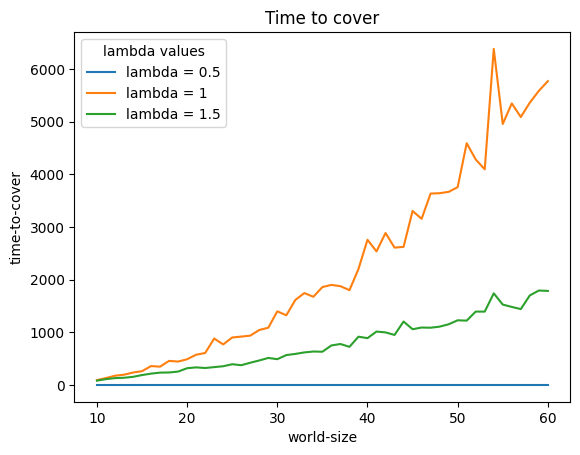

In [92]:
lazy_num.groupby('lambda')['time-to-cover'].plot(legend=True, xlabel='world-size', ylabel='time-to-cover', title='Time to cover')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

The situations with lambdas here is similar to previous experiment, but we can see that time to cover increases with bigger world size and it is obvious why.

In [93]:
lazy_num.groupby('lambda')['percentage-of-visited'].mean()

lambda
0.5     23.77393
1.0    100.00000
1.5    100.00000
Name: percentage-of-visited, dtype: float64

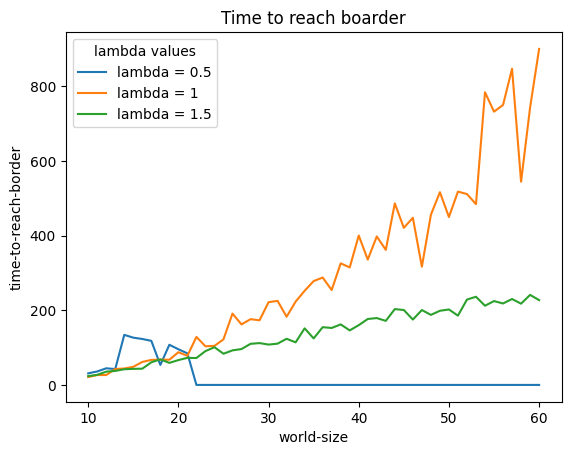

In [94]:
lazy_num.groupby('lambda')['time-to-reach-border'].plot(legend=True, xlabel='world-size', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

The idea of time to reach border is similar to time to cover. The only difference is that in the start time to reach border for lambda = 0.5 is not 0 and it is because world is small enough to reach border before step becomes too small

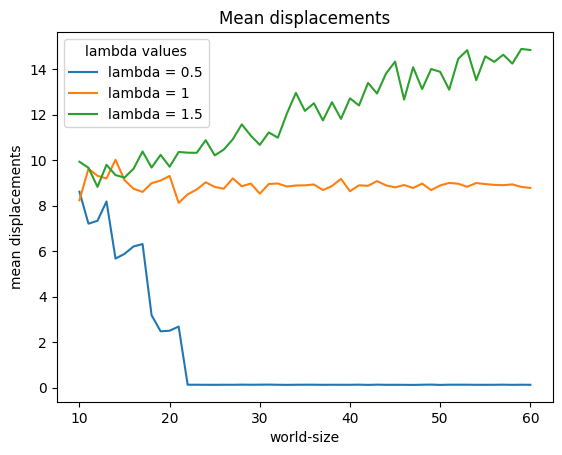

In [95]:
lazy_num.groupby('lambda')['mean displacements-before-border-reach'].plot(legend=True, xlabel='world-size', ylabel='mean displacements', title='Mean displacements')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

Here we can see pretty similar behavior to lazy with fixed world size. 

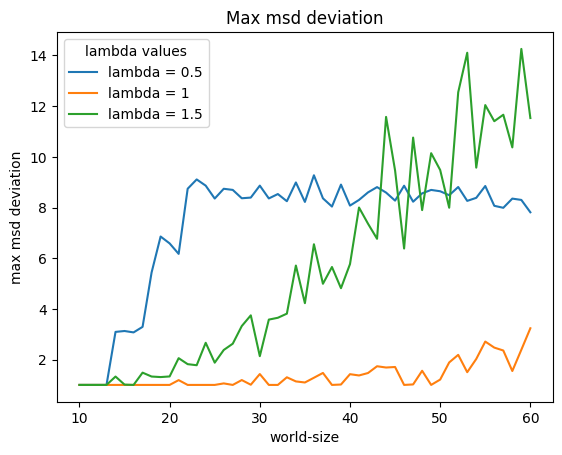

In [96]:
lazy_num.groupby('lambda')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='world-size', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['lambda = 0.5', 'lambda = 1', 'lambda = 1.5'], title='lambda values')

## Constraint random walk with fixed world size

Here we will have constraint random walk with fixed world size and will be changing number of agents and max-angle

In [97]:
constraint_world_size = load_data('data/experiment-constraint-fixed-world-size-table.csv')
constraint_world_size = constraint_world_size.drop(columns=['[run number]', '[step]'])
constraint_world_size = constraint_world_size.groupby(['max-angle', 'num']).mean().reset_index('max-angle')

In [98]:
constraint_world_size.head()

,max-angle,world-size,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
num,,,,,,,,
50,90,50.0,6.267839,13.889946,2581.5,157.0,100.0,2581.5
51,90,50.0,6.143914,12.027073,2438.5,105.5,100.0,2438.5
52,90,50.0,6.470978,13.595561,2909.5,209.0,100.0,2909.5
53,90,50.0,6.058997,12.702691,2802.5,124.5,100.0,2802.5
54,90,50.0,6.079288,13.228522,2396.5,165.0,100.0,2396.5


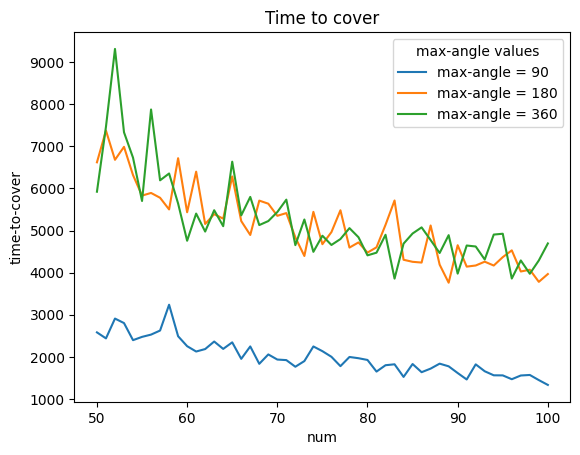

In [99]:
constraint_world_size.groupby('max-angle')['time-to-cover'].plot(legend=True, xlabel='num', ylabel='time-to-cover', title='Time to cover')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

For max angles 180 and 360 the plot will be similar because with these angles we will cover all angles from 0 to 360 and there will be bigger possibility to go again on covered angles.  
With max angle 90 there there will be smaller possibility to return to covered, so time will be smaller.
And all these times to cover decrease as number of agents increases and it is logical.

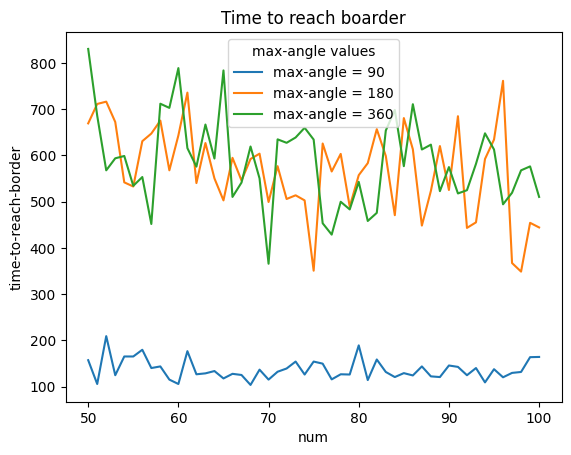

In [100]:
constraint_world_size.groupby('max-angle')['time-to-reach-border'].plot(legend=True, xlabel='num', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

Time to reach border does not depend on number of agents, which I sad before. And it is the same reason why for lambdas smaller than 180 it will by also smaller.

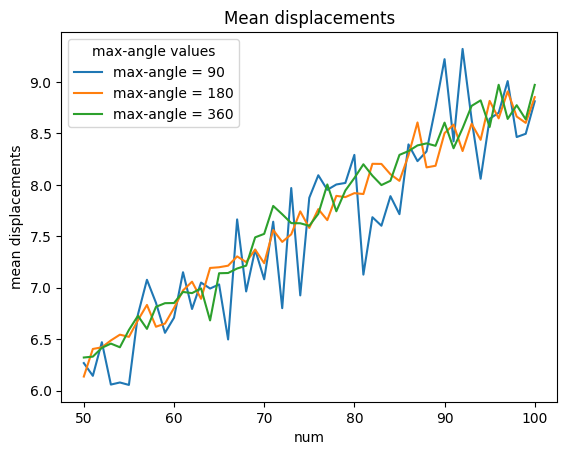

In [101]:
constraint_world_size.groupby('max-angle')['mean displacements-before-border-reach'].plot(legend=True, xlabel='num', ylabel='mean displacements', title='Mean displacements')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

Mean displacement is the same for these max angles and it increases because the more agents, the bigger displacement

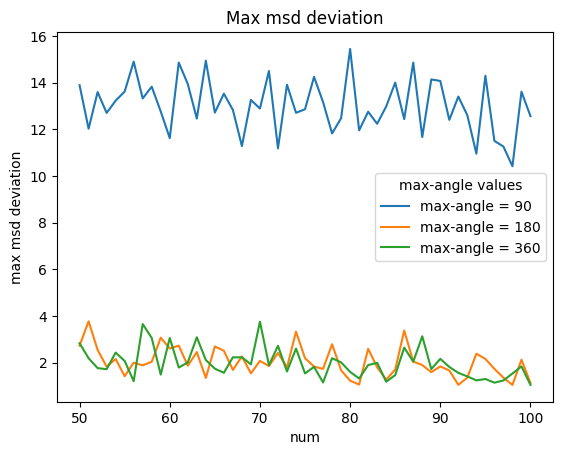

In [102]:
constraint_world_size.groupby('max-angle')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='num', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

For angles >= 180 max msd deviation will be the smallest, because these walks will be quite similar to pearson  random walk where measured msd is close to theoretical one.  
For other angles it will be a lot bigger.  
It does not depend on number of agents

## Constraint random walk with fixed num

Here we will have constraint random walk with fixed number of agents and will be changing world size and max-angle

In [103]:
constraint_num = load_data('data/experiment-constraint-fixed-num-table.csv')
constraint_num = constraint_num.drop(columns=['[run number]', '[step]'])
constraint_num = constraint_num.groupby(['max-angle', 'world-size']).mean().reset_index('max-angle')

In [104]:
constraint_num.head()

,max-angle,num,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
world-size,,,,,,,,
10,90,100.0,7.484163,3.258230,40.0,11.5,100.0,40.0
11,90,100.0,10.747889,3.679981,61.5,13.0,100.0,61.5
12,90,100.0,8.834658,4.073943,64.0,16.5,100.0,64.0
13,90,100.0,7.091803,4.436386,67.5,17.5,100.0,67.5
14,90,100.0,7.359336,4.718474,86.5,18.5,100.0,86.5


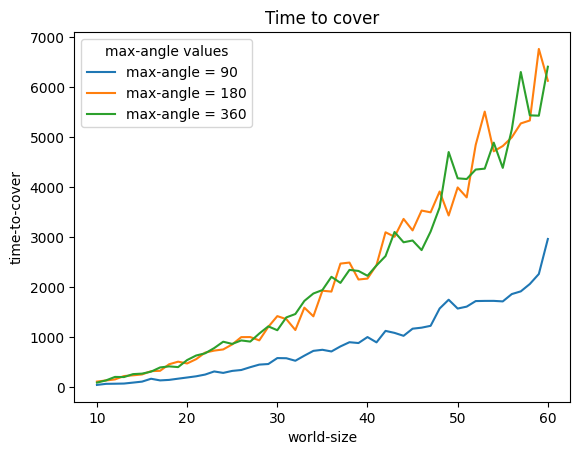

In [105]:
constraint_num.groupby('max-angle')['time-to-cover'].plot(legend=True, xlabel='world-size', ylabel='time-to-cover', title='Time to cover')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

The bigger word, the biggest tome to cover. It is obvious.
About max angles I explained in previous experiment.

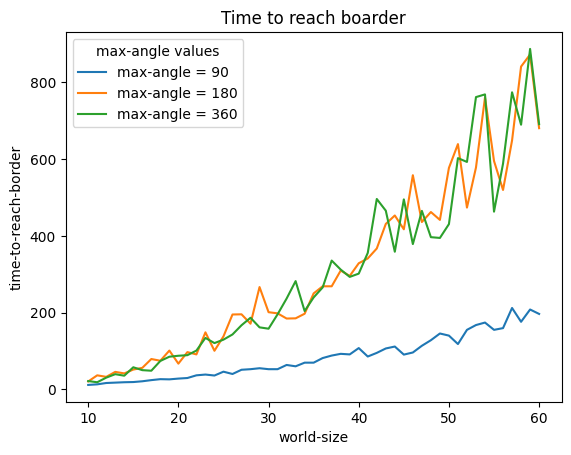

In [106]:
constraint_num.groupby('max-angle')['time-to-reach-border'].plot(legend=True, xlabel='world-size', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

The same idea as time to cover

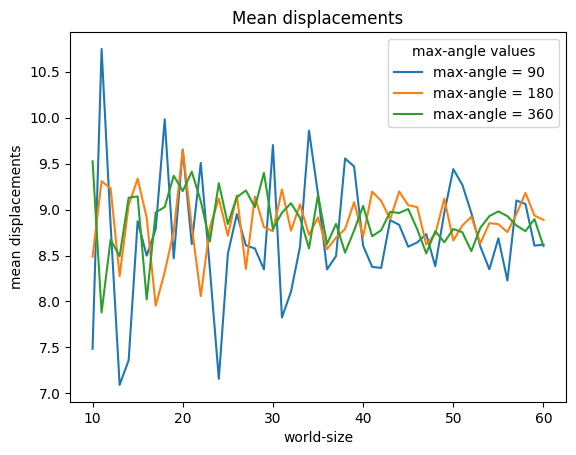

In [107]:
constraint_num.groupby('max-angle')['mean displacements-before-border-reach'].plot(legend=True, xlabel='world-size', ylabel='mean displacements', title='Mean displacements')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

Mean displacement is like this because it is not depending on world size.

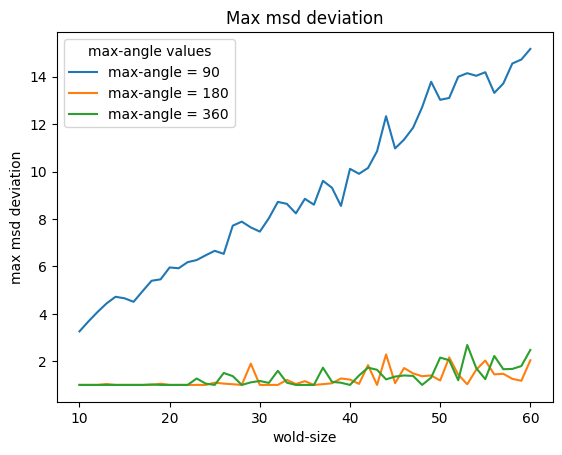

In [108]:
constraint_num.groupby('max-angle')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='wold-size', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['max-angle = 90', 'max-angle = 180', 'max-angle = 360'], title='max-angle values')

The same idea as in previous experiment, but max msd deviation of smaller angles is increasing with world size

## Deterministic random walk with fixed num

Here we will have deterministic random walk with fixed number of agents and will be changing step size and r

Firstly, for r: 1.01 - 3.57, 3.63, 3,74, 3.83 - 3.85 there will be a cycle, so I will investigate r = 0, r = 1, r = 3.82

In [109]:
deterministic_num = load_data('data/experiment-deterministic-fixed-num-table.csv')
deterministic_num = deterministic_num.drop(columns=['[run number]', '[step]'])
deterministic_num = deterministic_num.groupby(['r', 'step-size']).mean().reset_index('r')

In [110]:
deterministic_num.head()

,r,num,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
step-size,,,,,,,,
1.00,0.0,100.0,8.100600,52.318854,1611.0,60.0,100.0,1611.0
1.01,0.0,100.0,10.407750,51.898069,1814.5,59.0,100.0,1814.5
1.02,0.0,100.0,8.662976,52.411911,1980.5,59.0,100.0,1980.5
1.03,0.0,100.0,14.151521,51.963671,1713.5,58.0,100.0,1713.5
1.04,0.0,100.0,9.405564,52.468172,1852.0,58.0,100.0,1852.0


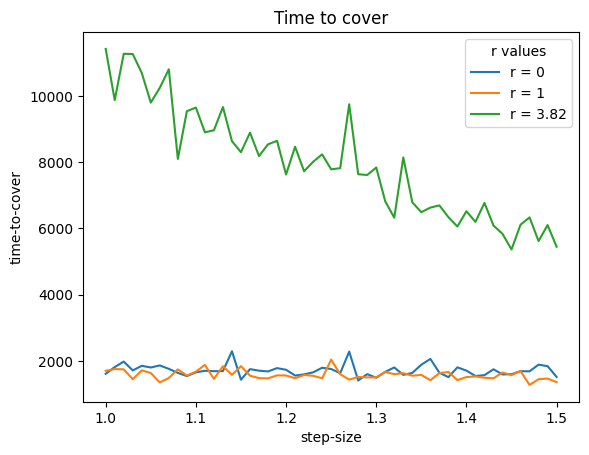

In [111]:
deterministic_num.groupby('r')['time-to-cover'].plot(legend=True, xlabel='step-size', ylabel='time-to-cover', title='Time to cover')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

When r = 1 agents seem to cover whole world faster, because when r = 0 agents do not change their direction. When r = 3.82 time to cover is the slowest and it is because agents move very close to their precious state and expanding really slow.

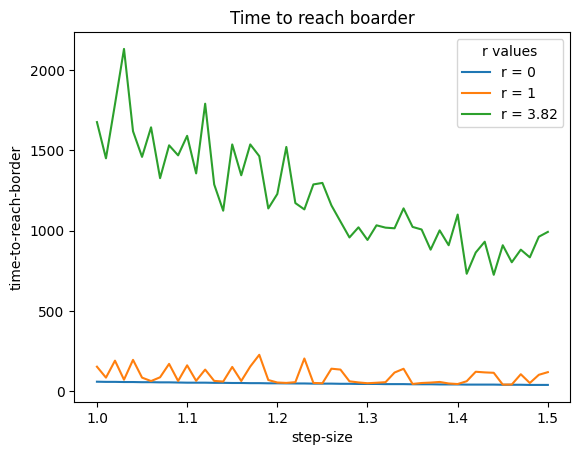

In [112]:
deterministic_num.groupby('r')['time-to-reach-border'].plot(legend=True, xlabel='step-size', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

For r = 0 time to reach border is the smallest and it is because their movements are just lines.  
For other r the idea is similar to time to cover.  
Also we can see that the biggest step size, the smaller time it takes to reach a border

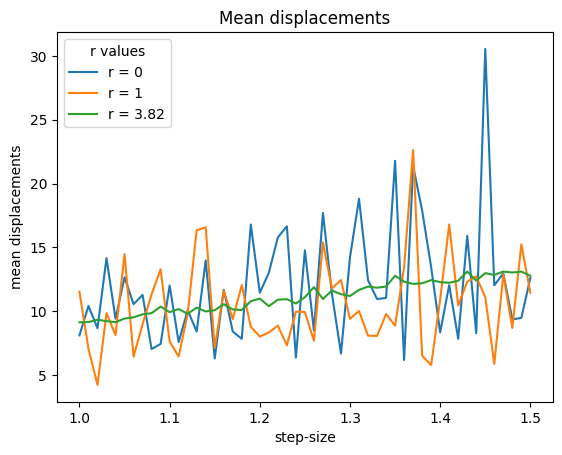

In [113]:
deterministic_num.groupby('r')['mean displacements-before-border-reach'].plot(legend=True, xlabel='step-size', ylabel='mean displacements', title='Mean displacements')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

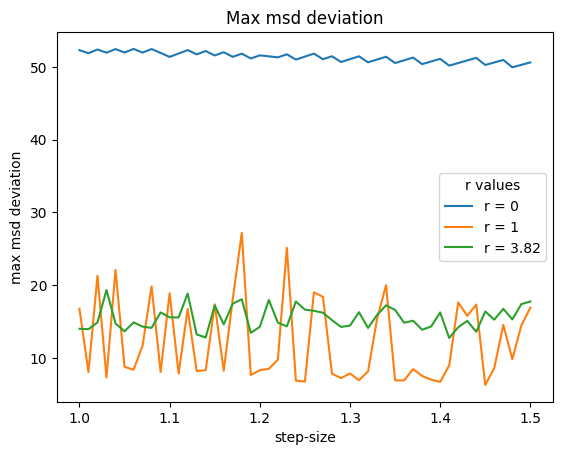

In [114]:
deterministic_num.groupby('r')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='step-size', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

## Deterministic random walk with fixed step size

Here we will have constraint random walk with fixed number of agents and will be changing world size and max-angle

In [115]:
deterministic_step_size = load_data('data/experiment-deterministic-fixed-step-size-table.csv')
deterministic_step_size = deterministic_step_size.drop(columns=['[run number]', '[step]'])
deterministic_step_size = deterministic_step_size.groupby(['r', 'num']).mean().reset_index('r')

In [116]:
deterministic_step_size.head()

,r,step-size,mean displacements-before-border-reach,max msd-deviations-before-border-reach,time-to-cover,time-to-reach-border,percentage-of-visited,ticks
num,,,,,,,,
50,0.0,1.0,6.160950,52.318854,3563.0,60.0,100.0,3563.0
51,0.0,1.0,6.212166,52.318854,2920.5,60.0,100.0,2920.5
52,0.0,1.0,5.439929,52.318854,2866.5,60.0,100.0,2866.5
53,0.0,1.0,5.167226,52.318854,3076.5,60.0,100.0,3076.5
54,0.0,1.0,2.986864,52.318854,3293.0,60.0,100.0,3293.0


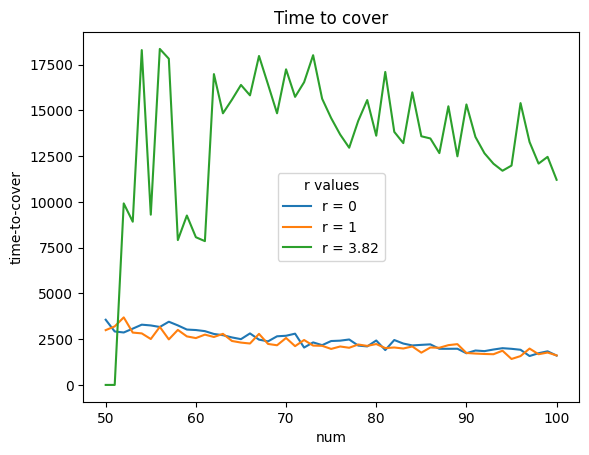

In [117]:
deterministic_step_size.groupby('r')['time-to-cover'].plot(legend=True, xlabel='num', ylabel='time-to-cover', title='Time to cover')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

The idea is similar to previous experiment

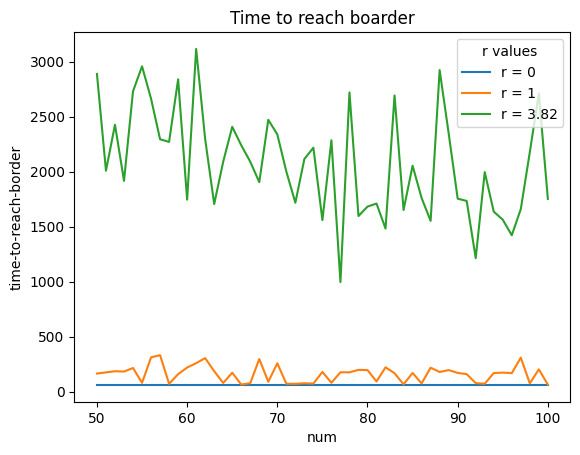

In [118]:
deterministic_step_size.groupby('r')['time-to-reach-border'].plot(legend=True, xlabel='num', ylabel='time-to-reach-border', title='Time to reach boarder')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

The idea is similar to previous experiment. And also time to reach border does not depend on number of agents

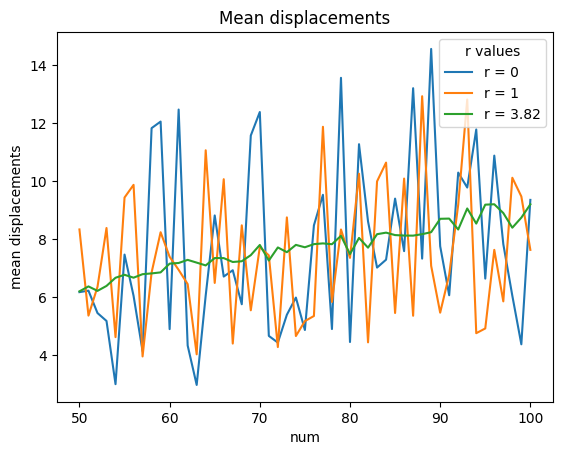

In [119]:
deterministic_step_size.groupby('r')['mean displacements-before-border-reach'].plot(legend=True, xlabel='num', ylabel='mean displacements', title='Mean displacements')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

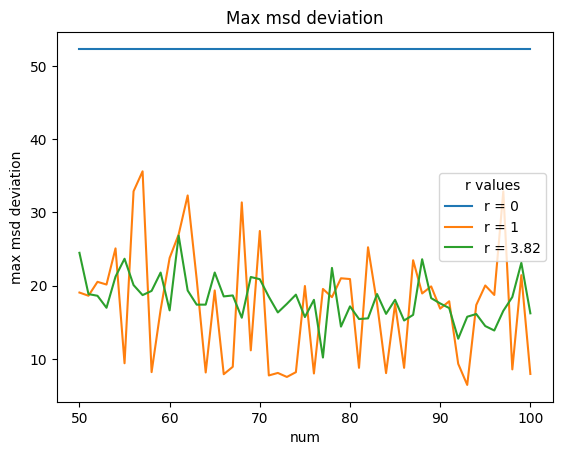

In [120]:
deterministic_step_size.groupby('r')['max msd-deviations-before-border-reach'].plot(legend=True, xlabel='num', ylabel='max msd deviation', title='Max msd deviation')
plt.legend(['r = 0', 'r = 1', 'r = 3.82'], title='r values')

## Angles

### Lazy random walk

In [121]:
lazy_angles = pd.read_csv('data/lazy_angles.csv', skiprows=16)
lazy_angles = lazy_angles.drop(columns=['color', 'pen down?'])

<AxesSubplot:xlabel='previous angle', ylabel='angle'>

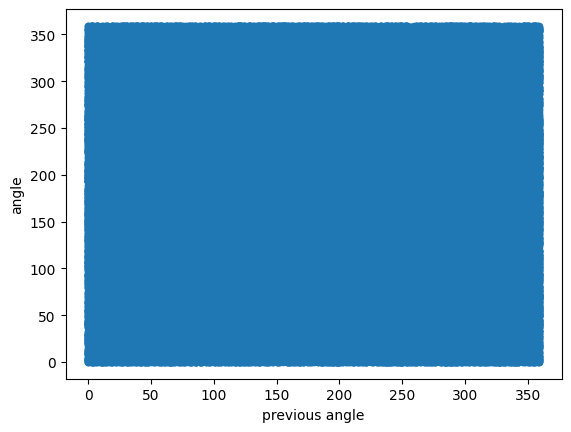

In [122]:
lazy_angles.plot.scatter(x='x', y='y', legend=False, xlabel='previous angle', ylabel='angle')

We start with random directions, so we can get any possible angle

### Constraint random walk

In [123]:
constraint_angles_90 = pd.read_csv('data/constraint_angles_90.csv', skiprows=16)
constraint_angles_90 = constraint_angles_90.drop(columns=['color', 'pen down?'])
constraint_angles_179 = pd.read_csv('data/constraint_angles_179.csv', skiprows=16)
constraint_angles_179 = constraint_angles_179.drop(columns=['color', 'pen down?'])
constraint_angles_180 = pd.read_csv('data/constraint_angles_180.csv', skiprows=16)
constraint_angles_180 = constraint_angles_180.drop(columns=['color', 'pen down?'])

<AxesSubplot:title={'center':'max angle = 180'}, xlabel='previous angle', ylabel='angle'>

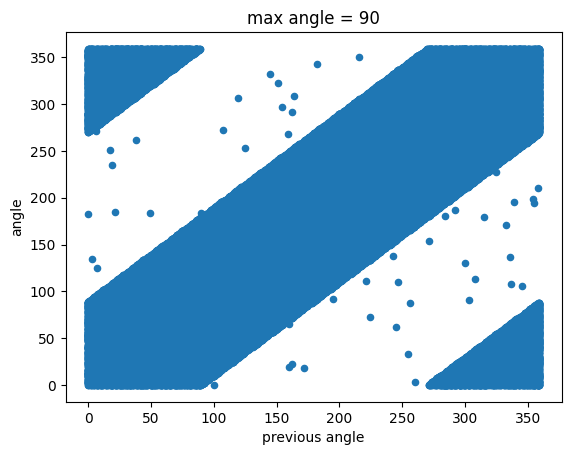

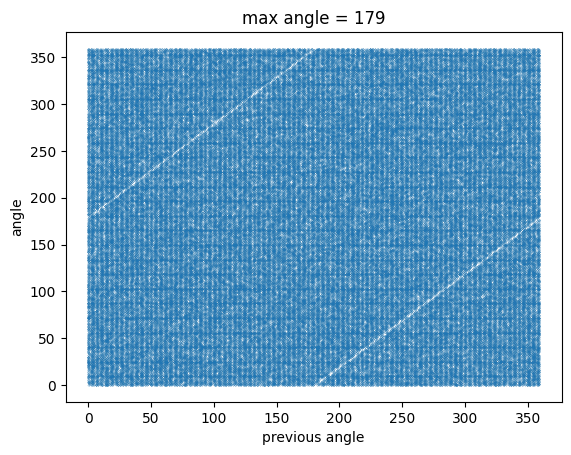

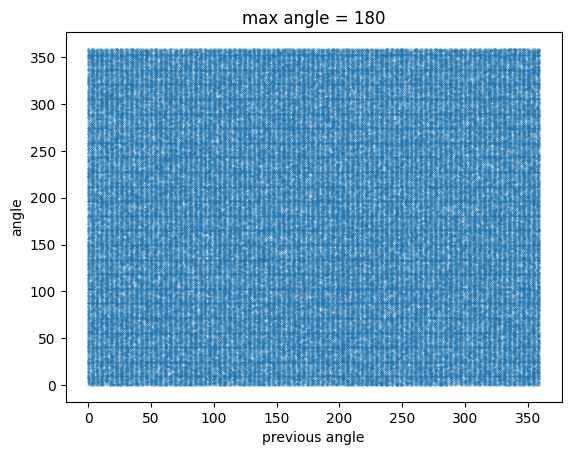

In [124]:
constraint_angles_90.plot.scatter(x='x', y='y', legend=False, xlabel='previous angle', ylabel='angle', title='max angle = 90')
constraint_angles_179.plot.scatter(x='x', y='y', legend=False, xlabel='previous angle', ylabel='angle', title='max angle = 179', s=0.01)
constraint_angles_180.plot.scatter(x='x', y='y', legend=False, xlabel='previous angle', ylabel='angle', title='max angle = 180', s=0.01)

For max-angle = 90 we will have angles that we cannot reach from previous angle because of formula heading = heading + (random (2 * max-angle)) - max-angle. This is empty spaces in plot  
max-angle = 179 is the last max-angle with angles we cannot reach  
And when max-angle = 180 plot contains all angles  
Generally:  
max-angle < 180 - we will have empty spaces, cannot get all angles
max-angle >= 180 - we can get all possible angles

### Discrete random walk

In [125]:
deterministic_angles = pd.read_csv('data/deterministic_angles.csv', skiprows=16)
deterministic_angles = deterministic_angles.drop(columns=['color', 'pen down?'])

<AxesSubplot:xlabel='previous angle', ylabel='angle'>

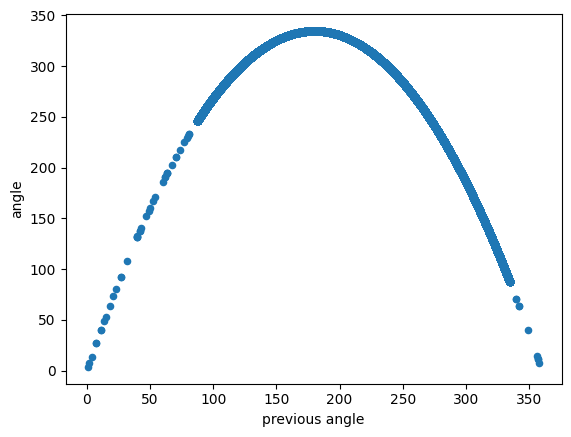

In [126]:
deterministic_angles.plot.scatter(x='x', y='y', legend=False, xlabel='previous angle', ylabel='angle')

We will have parabola because of equation curr-angle = curr-angle * r  * (1 - curr-angle)